In [ ]:
#This program for image clasification

In [ ]:
#import libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
#look at the data types of the variabels
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
#Get shapes of the arrays
print('x_train shape: ' , x_train.shape)
print('y_train shape: ' , y_train.shape)
print('x_test shape: ' , x_test.shape)
print('y_test shape: ' , y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


In [ ]:
#take a look at the first image as an array
index = 10 
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

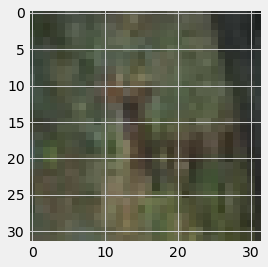

In [ ]:
#show the image as a pisctures
img = plt.imshow(x_train[index])

In [ ]:
#Get the image labels
print('the image label is: ' , y_train[index])

the image label is:  [4]


In [ ]:
#get the image classification
classification = ['airplanes', 'automobile', 'bird' , 'cat', 'deer', 'dog', 'frog' ,'horse' , 'ship' , 'truck']
#Print the image class
print('the image class is: ', classification[y_train[index][0]])

the image class is:  deer


In [ ]:
#covert the label into a set of 10 number to input the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
#print the news label
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
#print the new label of the image/pictures above
print ('the one hot label is : ', y_train_one_hot[index])

the one hot label is :  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
#normalize pixels to be values 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [ ]:
from matplotlib.cbook import flatten
#create the models architeccture
model = Sequential()

#add the first layer
model.add( Conv2D(32, (5,5), activation='relu' , input_shape=(32,32,3) ))

#add a pooling max
model.add(MaxPooling2D(pool_size =  (2,2) ))

#Add another convulution layer
model.add(Conv2D(32, (5,5), activation= 'relu' ))

#add a another pooling 
model.add(MaxPooling2D(pool_size =  (2,2) ))

#add a flattening layer
model.add(Flatten())

#add layer with 1000 neuron
model.add(Dense(1000, activation= 'relu' ))

#add a drop out layer
model.add(Dropout(0.5))

#add layer with 500 neuron
model.add(Dense(500, activation= 'relu' ))

#add a drop out layer
model.add(Dropout(0.5))

#add layer with 250 neuron
model.add(Dense(250, activation= 'relu' ))

#add layer with 10 neuron
model.add(Dense(10, activation= 'softmax' ))

In [ ]:
#compile model
model.compile(loss = 'categorical_crossentropy' ,
              optimizer='adam',
              metrics = ['accuracy'])

In [ ]:










































#Train the model
hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 256,
                 epochs =10,
                 validation_split = 0.2 )

Epoch 1/10
157/157 [==============================] - 61s 382ms/step - loss: 1.8246 - accuracy: 0.3189 - val_loss: 1.4984 - val_accuracy: 0.4548
Epoch 2/10
157/157 [==============================] - 57s 365ms/step - loss: 1.4537 - accuracy: 0.4687 - val_loss: 1.3547 - val_accuracy: 0.5039
Epoch 3/10
157/157 [==============================] - 58s 367ms/step - loss: 1.3117 - accuracy: 0.5260 - val_loss: 1.2403 - val_accuracy: 0.5543
Epoch 4/10
157/157 [==============================] - 57s 363ms/step - loss: 1.2017 - accuracy: 0.5686 - val_loss: 1.2406 - val_accuracy: 0.5620
Epoch 5/10
157/157 [==============================] - 57s 363ms/step - loss: 1.1146 - accuracy: 0.6019 - val_loss: 1.0899 - val_accuracy: 0.6131
Epoch 6/10
157/157 [==============================] - 57s 365ms/step - loss: 1.0400 - accuracy: 0.6298 - val_loss: 1.0754 - val_accuracy: 0.6233
Epoch 7/10
157/157 [==============================] - 57s 364ms/step - loss: 0.9744 - accuracy: 0.6549 - val_loss: 1.0163 - val_ac

In [ ]:
#Evaluate Model using the datsets
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 5s 17ms/step - loss: 1.0027 - accuracy: 0.6563


0.6563000082969666

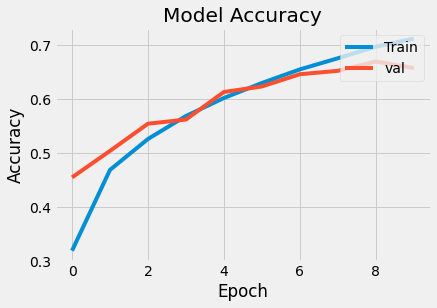

In [ ]:
#visualize  the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc = 'upper right')
plt.show()

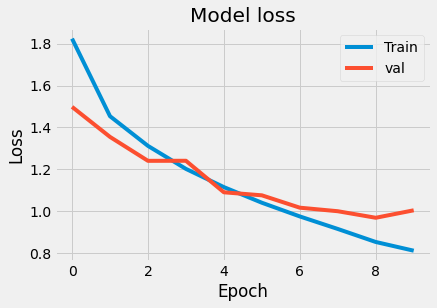

In [ ]:
#visualize model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc = 'upper right')
plt.show()

In [ ]:
#test model with an example
from google.colab import files
uploaded = files.upload()

Saving Cat.jpg to Cat.jpg


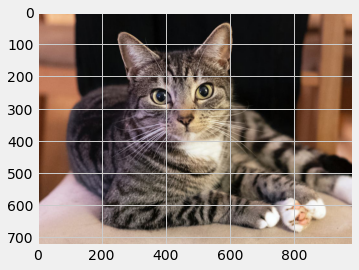

In [ ]:
#show the image
new_image = plt.imread('Cat.jpg')
img = plt.imshow(new_image)

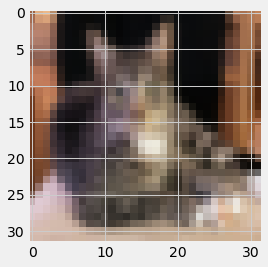

In [ ]:
#resize the image
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [ ]:
#get the model predictions
predictions = model.predict(np.array([resized_image]))
#resized the predictions
predictions

array([[2.3097844e-05, 4.6054683e-05, 4.9073910e-03, 5.8991981e-01,
        5.0031669e-03, 5.2034080e-02, 3.4741515e-01, 5.9695210e-04,
        2.4722385e-06, 5.1874336e-05]], dtype=float32)

In [ ]:
#sort the predictions from least to greatest
list_index= [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10) :
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[1] = list_index[j]
      list_index[j] = temp

#show sorted label in order
print(list_index)


[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [ ]:
#print the first 5 predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]]*100 ), '%' )

cat : 59 %
cat : 59 %
cat : 59 %
cat : 59 %
cat : 59 %
